# `ImageDraw`&nbsp;模块

这个&nbsp;`ImageDraw`&nbsp;模块提供简单的二维图形&nbsp;`Image`&nbsp;物体。您可以使用此模块创建新图像、对现有图像进行注释或润色，以及动态生成图形以供Web使用。

有关PIL的更高级绘图库，请参见&nbsp;aggdraw module&nbs</ins>

## 示例：在图像上绘制灰色十字

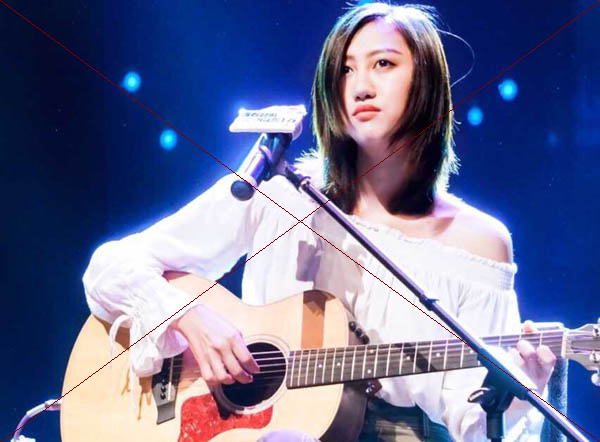

In [2]:
from PIL import Image, ImageDraw

im = Image.open("cl2.jpg")

draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)

# write to stdout
im

## 概念

### 协调

图形界面使用与PIL本身相同的坐标系，左上角有（0，0）。在图像边界之外绘制的任何像素都将被丢弃。

### 颜色

要指定颜色，可以使用数字或元组，就像使用&nbsp;`PIL.Image.new()`&nbsp;或&nbsp;`PIL.Image.Image.putpixel()`&nbsp;. 对于“1”、“l”和“i”图像，使用整数。对于“rgb”图像，使用包含整数值的3元组。对于“f”图像，使用整数或浮点值。

对于调色板图像（模式“p”），使用整数作为颜色索引。在1.1.4及更高版本中，还可以使用RGB 3元组或颜色名称（见下文）。绘图层将自动分配颜色索引，只要不使用超过256种颜色绘制。

### 颜色名称

见&nbsp;颜色名称&nbsp;Pillow 支持的颜色名称。

### 字体

PIL可以使用位图字体或OpenType/TrueType字体。

位图字体以PIL自己的格式存储，其中每个字体通常由两个文件组成，一个文件名为.pil，另一个文件名为.pbm。前者包含字体度量，后者包含栅格数据。

要加载位图字体，请使用&nbsp;`ImageFont`&nbsp;模块。

要加载OpenType/TrueType字体，请使用&nbsp;`ImageFont`&nbsp;模块。请注意，此功能依赖于第三方库，可能在所有PIL构建中都不可用。

## 示例：绘制部分不透明度文本

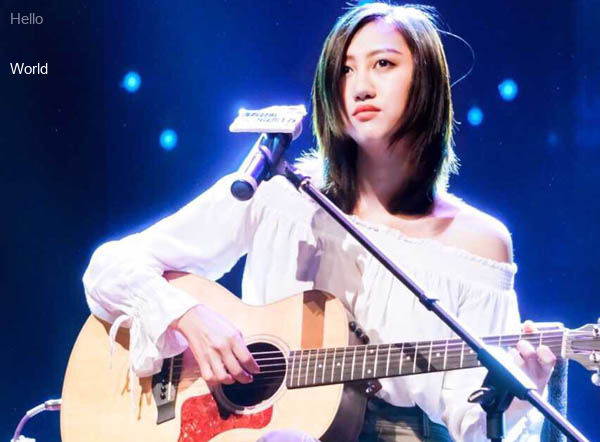

In [2]:
from PIL import Image, ImageDraw, ImageFont
# get an image
base = Image.open('cl2.jpg').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
# fnt = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 40)
fnt = ImageFont.truetype("arial.ttf", 15)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10,10), "Hello", font=fnt, fill=(255,255,255,128))
# draw text, full opacity
d.text((10,60), "World", font=fnt, fill=(255,255,255,255))

out = Image.alpha_composite(base, txt)

out

## 功能

_class_`PIL.ImageDraw.Draw`(_im_,&nbsp;_mode=None_)

创建可用于绘制给定图像的对象。
 
请注意，图像将在适当的位置进行修改。

* 参数
  *  **im**&nbsp;-- 要绘制的图像      
  *  **mode**&nbsp;-- 用于颜色值的可选模式。对于RGB图像，此参数可以是RGB或RGBA（将图形混合到图像中）。对于所有其他模式，此参数必须与图像模式相同。如果忽略，则模式默认image**&nbsp;-- 目标图像。
  

## 方法

`PIL.ImageDraw.ImageDraw.getfont`()

获取当前默认字体。
    
* 返回
  *  图像字体。



In [8]:
d.getfont()

`PIL.ImageDraw.ImageDraw.arc`(_xy_,&nbsp;_start_,&nbsp;_end_,&nbsp;_fill=None_,&nbsp;_width=0_)

在给定的边界框内，在起始角和结束角之间绘制圆弧（圆轮廓的一部分）。
    
* 参数
  *  **xy**&nbsp;-- 定义边界框的两点。序列&nbsp;`[(x0, y0), (x1, y1)]`&nbsp;或&nbsp;`[x0, y0, x1, y1]`&nbsp;在哪里&nbsp;`x1 >= x0`和&nbsp;`y1 >= y0`&nbsp;.
  *  **start**&nbsp;-- 起始角度，以度为单位。角度从3点钟开始测量，顺时针增加。
  *  **end**&nbsp;-- 结束角度，以度为单位。
  *  **fill**&nbsp;-- 用于弧的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：5.3.0



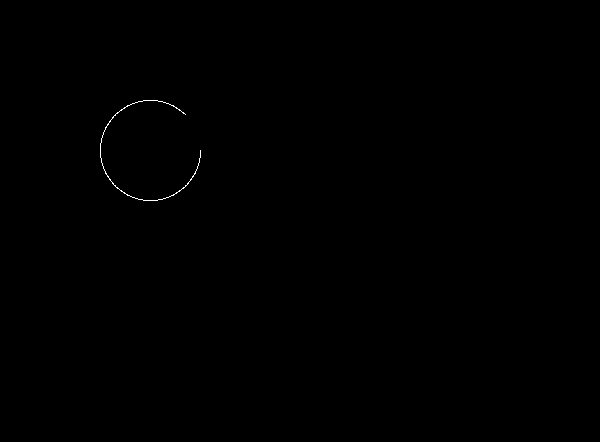

In [3]:
tmp = Image.new('RGBA', base.size, (0,0,0,255))
d = ImageDraw.Draw(tmp)
d.arc([100,100,200,200],0,-45)
tmp

`PIL.ImageDraw.ImageDraw.bitmap`(_xy_,&nbsp;_bitmap_,&nbsp;_fill=None_)

使用非零部分的当前填充颜色在给定位置绘制位图（遮罩）。位图应该是有效的透明蒙版（模式“1”）或蒙版（模式“l”或“rgba”）。
    
这相当于&nbsp;`image.paste(xy, color, bitmap)`&nbsp;.

要将像素数据粘贴到图像中，请使用&nbsp;`paste()`&nbsp;方法。



`PIL.ImageDraw.ImageDraw.chord`(_xy_,&nbsp;_start_,&nbsp;_end_,&nbsp;_fill=None_,&nbsp;_outline=None_,&nbsp;_width=1_)

等同于&nbsp;`arc()`&nbsp;，但用直线连接端点。
    
* 参数
  *  **xy**&nbsp;-- 定义边界框的两点。序列&nbsp;`[(x0, y0), (x1, y1)]`&nbsp;或&nbsp;`[x0, y0, x1, y1]`&nbsp;在哪里&nbsp;`x1 >= x0`和&nbsp;`y1 >= y0`&nbsp;.
  *  **outline**&nbsp;-- 用于轮廓的颜色。
  *  **fill**&nbsp;-- 用于填充的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：5.3.0


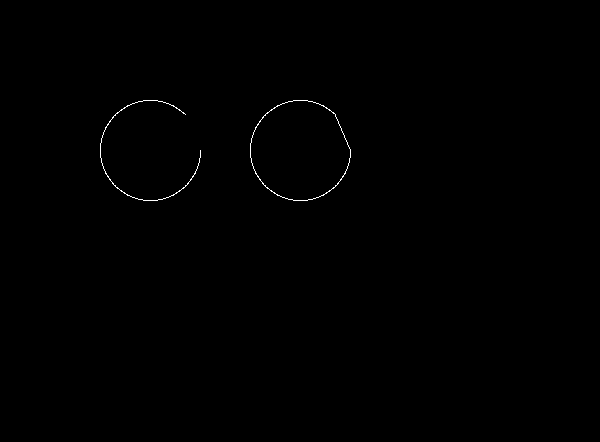

In [4]:
d.chord([250,100,350,200],0,-45)
tmp

`PIL.ImageDraw.ImageDraw.ellipse`(_xy_,&nbsp;_fill=None_,&nbsp;_outline=None_,&nbsp;_width=1_)

在给定的边界框内绘制椭圆。
    
* 参数
  *  **xy**&nbsp;-- 定义边界框的两点。任何一个的序列&nbsp;`[(x0, y0), (x1, y1)]`&nbsp;或&nbsp;`[x0, y0, x1, y1]`&nbsp;在哪里&nbsp;`x1 >= x0`&nbsp;和&nbsp;`y1 >= y0`&nbsp;.
  *  **outline**&nbsp;-- 用于轮廓的颜色。
  *  **fill**&nbsp;-- 用于填充的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：5.3.0



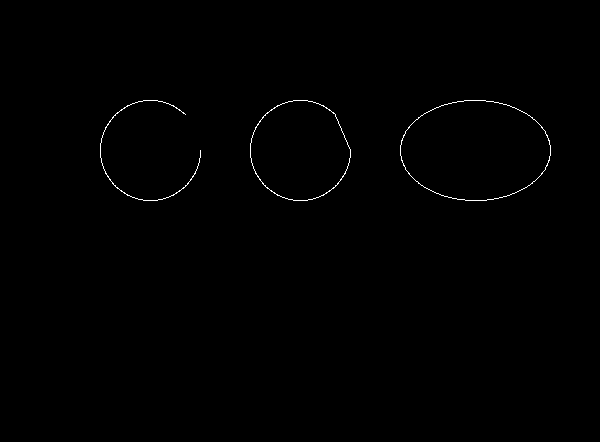

In [5]:
d.ellipse([400,100,550,200])
tmp

`PIL.ImageDraw.ImageDraw.line`(_xy_,&nbsp;_fill=None_,&nbsp;_width=0_,&nbsp;_joint=None_)

在中的坐标之间绘制一条线&nbsp;**xy**&nbsp;名单。
    
* 参数
  *  **xy**&nbsp;-- 两个元组的序列&nbsp;`[(x, y), (x, y), ...]`&nbsp;或类似的数值&nbsp;`[x, y, x, y, ...]`&nbsp;.
  *  **fill**&nbsp;-- 用于线条的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：1.1.5..注意：此选项在1.1.6版之前已被破坏。
  *  **joint**&nbsp;-- 一系列线条之间的关节类型。它可以是“曲线”，对于圆形边缘，也可以是“无”。…添加的版本：5.3.0



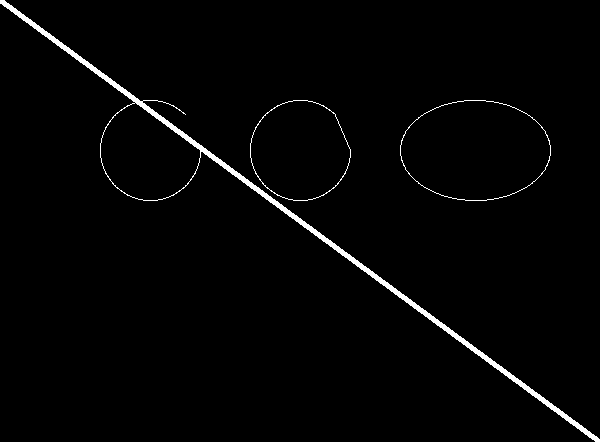

In [7]:
d.line((0, 0)+ tmp.size, width=5,fill=128)
tmp

`PIL.ImageDraw.ImageDraw.pieslice`(_xy_,&nbsp;_start_,&nbsp;_end_,&nbsp;_fill=None_,&nbsp;_outline=None_,&nbsp;_width=1_)

与圆弧相同，但也在端点和边界框中心之间绘制直线。
    
* 参数
  *  **xy**&nbsp;-- 定义边界框的两点。序列&nbsp;`[(x0, y0), (x1, y1)]`&nbsp;或&nbsp;`[x0, y0, x1, y1]`&nbsp;在哪里&nbsp;`x1 >= x0`和&nbsp;`y1 >= y0`&nbsp;.
  *  **start**&nbsp;-- 起始角度，以度为单位。角度从3点钟开始测量，顺时针增加。
  *  **end**&nbsp;-- 结束角度，以度为单位。
  *  **fill**&nbsp;-- 用于填充的颜色。
  *  **outline**&nbsp;-- 用于轮廓的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：5.3.0



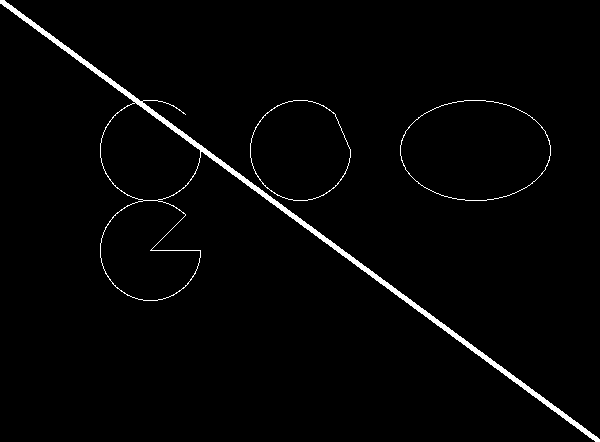

In [8]:
d.pieslice([100,200,200,300],0,-45)
tmp

`PIL.ImageDraw.ImageDraw.point`(_xy_,&nbsp;_fill=None_)

在给定坐标处绘制点（单个像素）。
    
* 参数
  *  **xy**&nbsp;-- 两个元组的序列&nbsp;`[(x, y), (x, y), ...]`&nbsp;或类似的数值&nbsp;`[x, y, x, y, ...]`&nbsp;.
  *  **fill**&nbsp;-- 用于点的颜色。



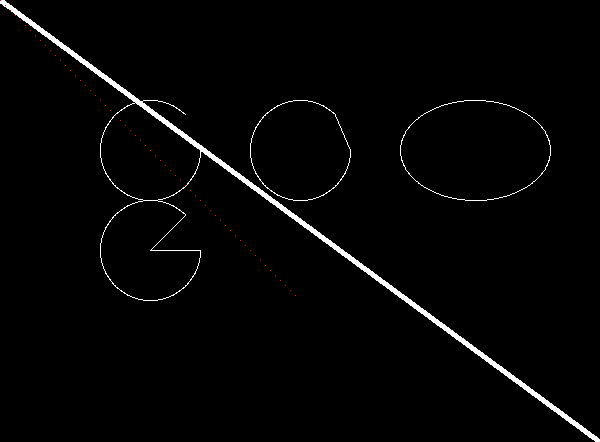

In [9]:
xy = [(i, i) for i in range(0, 300, 5)]
d.point(xy, "#FF0000")
tmp

`PIL.ImageDraw.ImageDraw.polygon`(_xy_,&nbsp;_fill=None_,&nbsp;_outline=None_)

绘制多边形。
    
多边形轮廓由给定坐标之间的直线以及最后一个坐标和第一个坐标之间的直线组成。
    
* 参数
  *  **xy**&nbsp;-- 两个元组的序列&nbsp;`[(x, y), (x, y), ...]`&nbsp;或类似的数值&nbsp;`[x, y, x, y, ...]`&nbsp;.
  *  **outline**&nbsp;-- 用于轮廓的颜色。
  *  **fill**&nbsp;-- 用于填充的颜色。



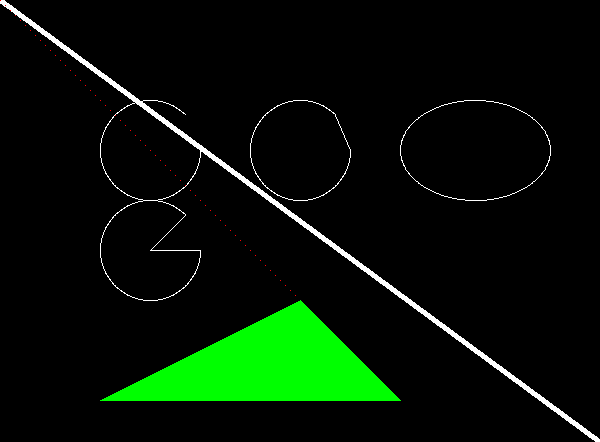

In [10]:
 d.polygon([300,300,100,400, 400, 400], fill = (0, 255, 0))
 tmp

`PIL.ImageDraw.ImageDraw.rectangle`(_xy_,&nbsp;_fill=None_,&nbsp;_outline=None_,&nbsp;_width=1_)

绘制矩形。
    
* 参数
  *  **xy**&nbsp;-- 定义边界框的两点。任何一个的序列&nbsp;`[(x0, y0), (x1, y1)]`&nbsp;或&nbsp;`[x0, y0, x1, y1]`&nbsp;. 第二个点正好在绘制的矩形之外。
  *  **outline**&nbsp;-- 用于轮廓的颜色。
  *  **fill**&nbsp;-- 用于填充的颜色。
  *  **width**&nbsp;-- 线条宽度，以像素为单位。…添加的版本：5.3.0



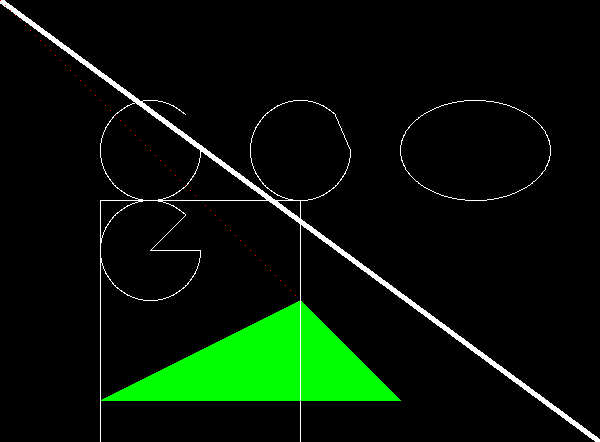

In [12]:
d.rectangle([100,200,300,500])
tmp

`PIL.ImageDraw.ImageDraw.shape`(_shape_,&nbsp;_fill=None_,&nbsp;_outline=None_)

警告
    
这种方法是实验性的。
    
画一个形状。



`PIL.ImageDraw.ImageDraw.text`(_xy_,&nbsp;_text_,&nbsp;_fill=None_,&nbsp;_font=None_,&nbsp;_anchor=None_,&nbsp;_spacing=4_,&nbsp;_align="left"_,&nbsp;_direction=None_,&nbsp;_features=None_,&nbsp;_language=None_,&nbsp;_stroke_width=0_,&nbsp;_stroke_fill=None_)

在给定位置绘制字符串。
    
* 参数
  *  **xy**&nbsp;-- 文本的左上角。
  *  **text**&nbsp;-- 要绘制的文本。如果它包含任何换行符，则将文本传递给多行文本（）
  *  **fill**&nbsp;-- 用于文本的颜色。
  *  **font**&nbsp;-- 安&nbsp;`ImageFont`&nbsp;实例。
  *  **spacing**&nbsp;-- 如果文本被传递到multiline_text（），则表示行与行之间的像素数。
  *  **align**&nbsp;-- 如果文本被传递到多行_text（），“Left”、“Center”或“Right”。
  *  **direction**&nbsp;-- 文本的方向。它可以是“rtl”（从右到左）、“ltr”（从左到右）或“ttb”（从上到下）。需要libraqm。…添加的版本：4.2.0
  *  **features**&nbsp;-- 文本布局期间要使用的OpenType字体功能列表。这通常用于打开默认情况下未启用的可选字体功能，例如“dlig”或“ss01”，但也可用于关闭默认字体功能，例如“-liga”禁用连字，或“-kern”禁用紧排。要获取所有支持的功能，请参阅https://docs.microsoft.com/en-us/typography/openttype/spec/featurelist requires libraqm。…添加的版本：4.2.0
  *  **language**&nbsp;-- 文本的语言。不同的语言可以使用不同的字形或连字。此参数告诉文本使用哪种语言的字体，并根据需要应用正确的替换（如果可用）。应该是一个&nbsp;_BCP 47 language code &lt;https://www.w3.org/International/articles/language-tags/&gt;_&nbsp;需要libraqm。我是说…版本已添加：：6.0.0
  *  **stroke_width**&nbsp;-- 文本笔划的宽度。。版本号：6.2.0
  *  **stroke_fill**&nbsp;-- 用于文本笔划的颜色。如果没有给出，将默认为&nbsp;`fill`&nbsp;参数。。版本号：6.2.0



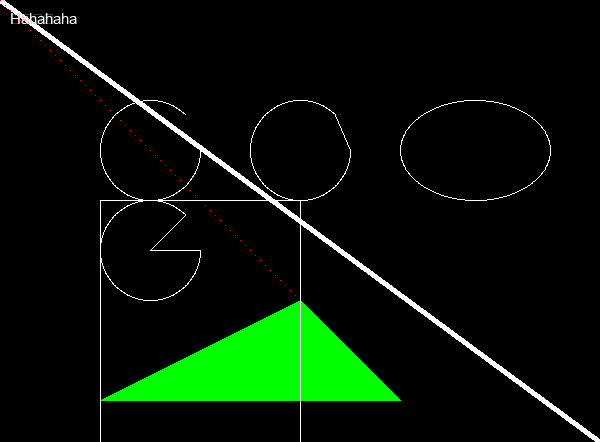

In [15]:
d.text((10,10), "Hahahaha", font=fnt, fill="#FFFFFF")
tmp

`PIL.ImageDraw.ImageDraw.multiline_text`(_xy_,&nbsp;_text_,&nbsp;_fill=None_,&nbsp;_font=None_,&nbsp;_anchor=None_,&nbsp;_spacing=4_,&nbsp;_align="left"_,&nbsp;_direction=None_,&nbsp;_features=None_,&nbsp;_language=None_)

在给定位置绘制多行字符串。
    
* 参数
  *  **xy**&nbsp;-- 文本的左上角。
  *  **text**&nbsp;-- 要绘制的文本。
  *  **fill**&nbsp;-- 用于文本的颜色。
  *  **font**&nbsp;-- 安&nbsp;`ImageFont`&nbsp;实例。
  *  **spacing**&nbsp;-- 行与行之间的像素数。
  *  **align**&nbsp;-- “左”、“中”或“右”。
  *  **direction**&nbsp;-- 文本的方向。它可以是“rtl”（从右到左）、“ltr”（从左到右）或“ttb”（从上到下）。需要libraqm。…添加的版本：4.2.0
  *  **features**&nbsp;-- 文本布局期间要使用的OpenType字体功能列表。这通常用于打开默认情况下未启用的可选字体功能，例如“dlig”或“ss01”，但也可用于关闭默认字体功能，例如“-liga”禁用连字，或“-kern”禁用紧排。要获取所有支持的功能，请参阅https://docs.microsoft.com/en-us/typography/openttype/spec/featurelist requires libraqm。…添加的版本：4.2.0
  *  **language**&nbsp;-- 文本的语言。不同的语言可以使用不同的字形或连字。此参数告诉文本使用哪种语言的字体，并根据需要应用正确的替换（如果可用）。应该是一个&nbsp;_BCP 47 language code &lt;https://www.w3.org/International/articles/language-tags/&gt;_&nbsp;需要libraqm。我是说…版本已添加：：6.0.0



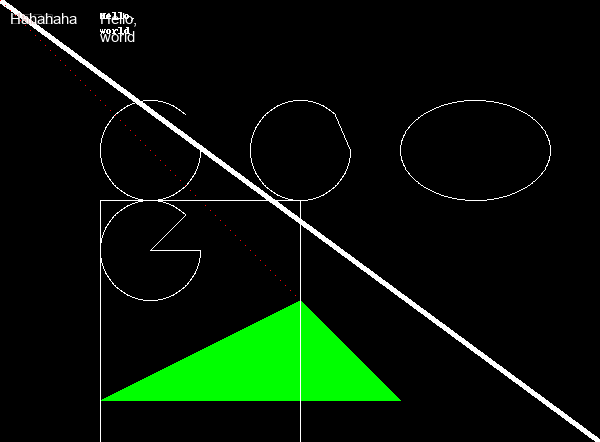

In [17]:
d.multiline_text((100,10), "Hello,\nworld", font=fnt, fill="#FFFFFF")
tmp

`PIL.ImageDraw.ImageDraw.textsize`(_text_,&nbsp;_font=None_,&nbsp;_spacing=4_,&nbsp;_direction=None_,&nbsp;_features=None_,&nbsp;_language=None_,&nbsp;_stroke_width=0_)

返回给定字符串的大小（像素）。
    
* 参数
  *  **text**&nbsp;-- 要测量的文本。如果它包含任何换行符，则文本将传递给多行utextsize（）。
  *  **font**&nbsp;-- 安&nbsp;`ImageFont`&nbsp;实例。
  *  **spacing**&nbsp;-- 如果将文本传递给多行_textsize（），则表示行与行之间的像素数。
  *  **direction**&nbsp;-- 文本的方向。它可以是“rtl”（从右到左）、“ltr”（从左到右）或“ttb”（从上到下）。需要libraqm。…添加的版本：4.2.0
  *  **features**&nbsp;-- 文本布局期间要使用的OpenType字体功能列表。这通常用于打开默认情况下未启用的可选字体功能，例如“dlig”或“ss01”，但也可用于关闭默认字体功能，例如“-liga”禁用连字，或“-kern”禁用紧排。要获取所有支持的功能，请参阅https://docs.microsoft.com/en-us/typography/openttype/spec/featurelist requires libraqm。…添加的版本：4.2.0
  *  **language**&nbsp;-- 文本的语言。不同的语言可以使用不同的字形或连字。此参数告诉文本使用哪种语言的字体，并根据需要应用正确的替换（如果可用）。应该是一个&nbsp;_BCP 47 language code &lt;https://www.w3.org/International/articles/language-tags/&gt;_&nbsp;需要libraqm。我是说…版本已添加：：6.0.0
  *  **stroke_width**&nbsp;-- 文本笔划的宽度。。版本号：6.2.0



In [18]:
d.textsize('woodman',fnt)

(64, 14)

`PIL.ImageDraw.ImageDraw.multiline_textsize`(_text_,&nbsp;_font=None_,&nbsp;_spacing=4_,&nbsp;_direction=None_,&nbsp;_features=None_,&nbsp;_language=None_,&nbsp;_stroke_width=0_)

返回给定字符串的大小（像素）。
    
* 参数
  *  **text**&nbsp;-- 要测量的文本。
  *  **font**&nbsp;-- 安&nbsp;`ImageFont`&nbsp;实例。
  *  **spacing**&nbsp;-- 行与行之间的像素数。
  *  **direction**&nbsp;-- 文本的方向。它可以是“rtl”（从右到左）、“ltr”（从左到右）或“ttb”（从上到下）。需要libraqm。…添加的版本：4.2.0
  *  **features**&nbsp;-- 文本布局期间要使用的OpenType字体功能列表。这通常用于打开默认情况下未启用的可选字体功能，例如“dlig”或“ss01”，但也可用于关闭默认字体功能，例如“-liga”禁用连字，或“-kern”禁用紧排。要获取所有支持的功能，请参阅https://docs.microsoft.com/en-us/typography/openttype/spec/featurelist requires libraqm。…添加的版本：4.2.0
  *  **language**&nbsp;-- 文本的语言。不同的语言可以使用不同的字形或连字。此参数告诉文本使用哪种语言的字体，并根据需要应用正确的替换（如果可用）。应该是一个&nbsp;_BCP 47 language code &lt;https://www.w3.org/International/articles/language-tags/&gt;_&nbsp;需要libraqm。我是说…版本已添加：：6.0.0
  *  **stroke_width**&nbsp;-- 文本笔划的宽度。。版本号：6.2.0



In [19]:
d.multiline_textsize('Hello,\nwoodman',fnt)

(64, 32)

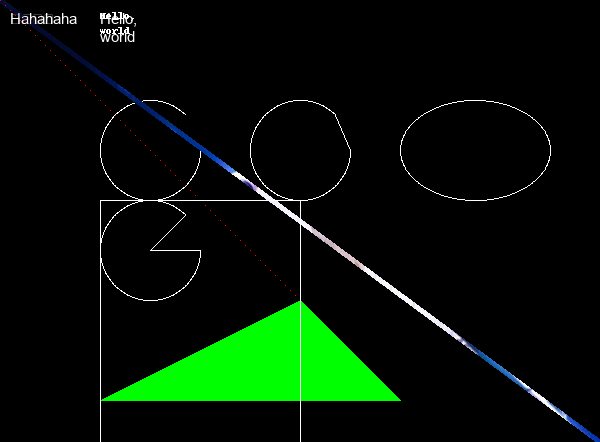

In [20]:
Image.alpha_composite(base, tmp)

`PIL.ImageDraw.getdraw`(_im=None_,&nbsp;_hints=None_)

警告
    
这种方法是实验性的。
    
基于WCK接口的PIL图像更高级的二维绘图接口。
    
* 参数
  *  **im**&nbsp;-- 要绘制的图像。
  *  **hints**&nbsp;-- 提示的可选列表。
    
* 返回
        （绘图上下文、绘图资源工厂）元组。

`PIL.ImageDraw.floodfill`(_image_,&nbsp;_xy_,&nbsp;_value_,&nbsp;_border=None_,&nbsp;_thresh=0_)

警告
    
这种方法是实验性的。
    
用给定颜色填充有界区域。
    
* 参数
  *  **image**&nbsp;-- 目标图像。
  *  **xy**&nbsp;-- 种子位置（2项坐标元组）。
  *  **value**&nbsp;-- 填充颜色。
  *  **border**&nbsp;-- 可选边框值。如果给定，该区域由颜色与边框颜色不同的像素组成。如果没有给出，该区域由与种子像素颜色相同的像素组成。